In [158]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [159]:
import os
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi_20_percent'

if image_path.is_dir():
    print(f'{image_path} already exists, skipping download...')
else:
    print(f'Creating pizza_steak_sushi...')
    image_path.mkdir(parents=True, exist_ok=True)

    with open(image_path / 'pizza_steak_sushi_20_percent.zip', 'wb') as f:
        request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip')
        f.write(request.content)
        
    with zipfile.ZipFile(image_path / 'pizza_steak_sushi_20_percent.zip', 'r') as zip_ref:
        zip_ref.extractall(image_path)

    os.remove(image_path / 'pizza_steak_sushi_20_percent.zip')

data\pizza_steak_sushi_20_percent already exists, skipping download...


In [160]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


In [161]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

Random image path: data\pizza_steak_sushi_20_percent\train\steak\405173.jpg
Image class: steak
Image height: 382
Image width: 512


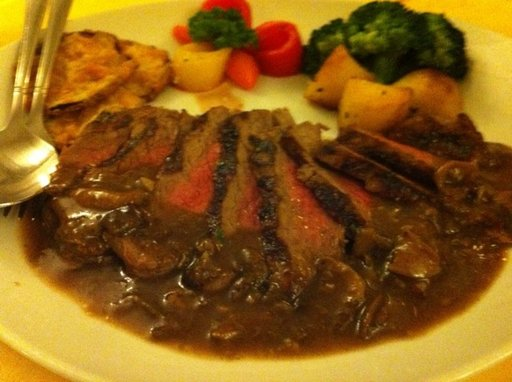

Random image path: data\pizza_steak_sushi_20_percent\train\sushi\3426958.jpg
Image class: sushi
Image height: 512
Image width: 512


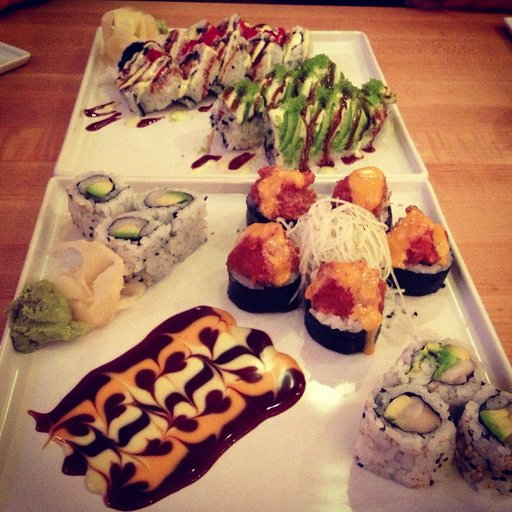

Random image path: data\pizza_steak_sushi_20_percent\train\sushi\733020.jpg
Image class: sushi
Image height: 512
Image width: 512


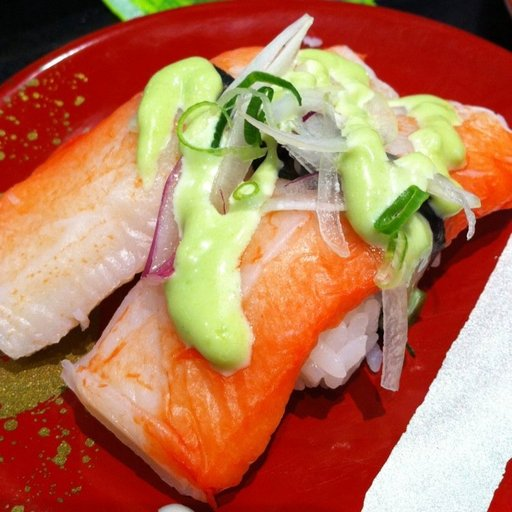

In [162]:
from PIL import Image
import random

image_path_list = list(image_path.glob('*/*/*.jpg'))

for random_image in random.sample(image_path_list, k=3):
    image = Image.open(random_image)
    image_class = random_image.parent.stem
    
    print(f"Random image path: {random_image}")
    print(f"Image class: {image_class}")
    print(f"Image height: {image.height}") 
    print(f"Image width: {image.width}")
    display(image)

In [163]:
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [164]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [165]:
img = random.choice(image_path_list)
img

WindowsPath('data/pizza_steak_sushi_20_percent/train/pizza/2490163.jpg')

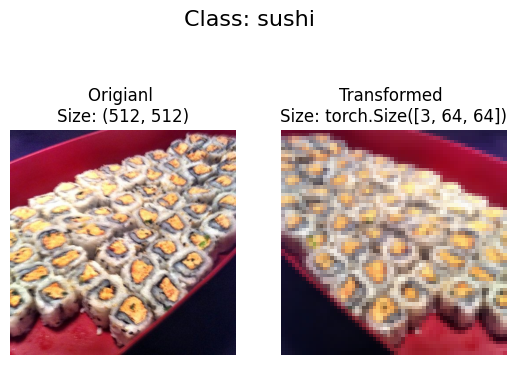

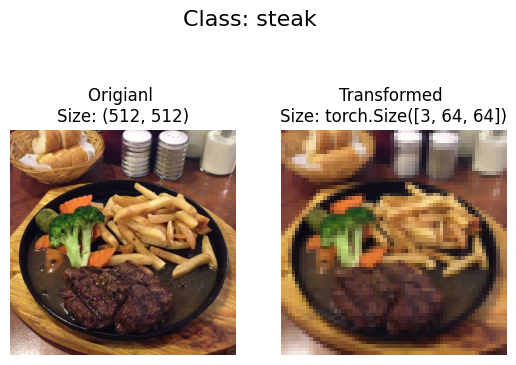

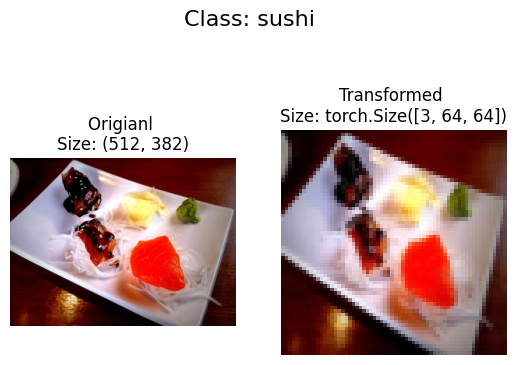

In [166]:
import matplotlib.pyplot as plt
import numpy as np

def plot_transformed_images(image_path_list, transform, n=3):
    for image in random.sample(image_path_list, k=n):
        with Image.open(image) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Origianl \nSize: {f.size}')
            ax[0].axis('off')
            
            transformed_image = transform(f)
            ax[1].imshow(transformed_image.permute(1,2,0))
            ax[1].set_title(f'Transformed \nSize: {transformed_image.shape}')
            ax[1].axis('off')
            
            fig.suptitle(f'Class: {image.parent.stem}', fontsize=16)
        
plot_transformed_images(image_path_list, 
                        data_transform)

In [167]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform_trivial_augment,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data\pizza_steak_sushi_20_percent\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data\pizza_steak_sushi_20_percent\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [168]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [169]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [170]:
img, label = next(iter(train_data))
img.shape, img.dtype, type(label)

(torch.Size([3, 64, 64]), torch.float32, int)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

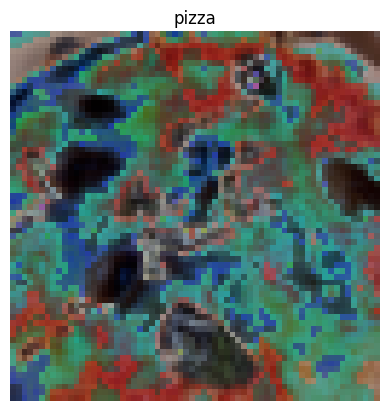

In [171]:
img, label = random.choice(train_data)

plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis('off')

In [172]:
try:
    some_object_iterator = iter(train_data)
    print(train_data, 'is iterable')
except TypeError as te:
    print(train_data, 'is not iterable')

Dataset ImageFolder
    Number of datapoints: 450
    Root location: data\pizza_steak_sushi_20_percent\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           ) is iterable


In [173]:
from torch.utils.data import DataLoader
import os

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f484fed3a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1f48e2ea4e0>)

In [174]:
img, label = next(iter(train_dataloader))
img.shape, label

(torch.Size([32, 3, 64, 64]),
 tensor([0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2,
         1, 1, 1, 0, 2, 1, 0, 1]))

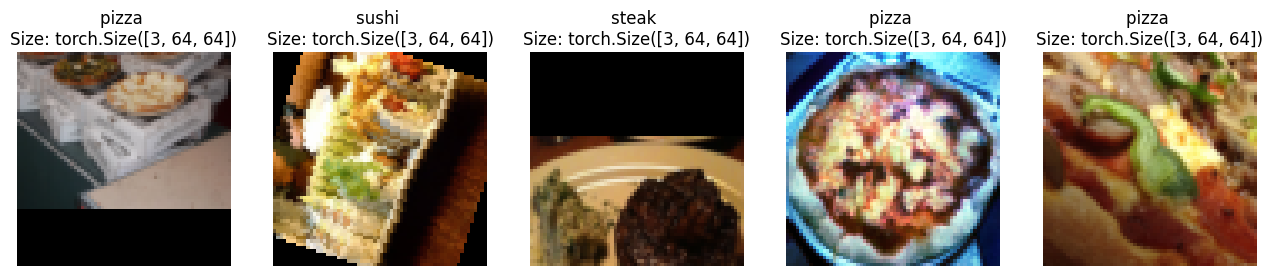

In [175]:
def display_random_images(dataset, classes, n):
    if n > 10:
        n = 10
        print(f'n shouldn\'t be larger than 10')
    
    plt.figure(figsize=(16,8))
    for i, (image, label) in enumerate(random.sample(list(dataset), k=n)):
        plt.subplot(1, n, i+1)
        plt.imshow(image.permute(1,2,0))
        plt.title(f'{classes[label]} \nSize: {image.shape}')
        plt.axis(False)
        
display_random_images(train_data,
                      class_names,
                      n=5)

In [176]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [177]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

In [178]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [179]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [180]:
def train_step(model,
               dataloader,
               loss_fn,
               optimizer,
               device=None):
    model.to(device)
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += ((y_pred_class == y).sum().item()) / len(y_pred)
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    return train_loss, train_acc

In [181]:
def test_step(model,
              dataloader,
              loss_fn,
              device=None):
    test_loss, test_acc = 0 ,0
    
    model.eval()
    model.to(device)
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
            test_pred_label = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
            test_acc += ((test_pred_label == y).sum().item()) / len(test_pred)
            
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
        
    return test_loss, test_acc

In [182]:
from tqdm.auto import tqdm

def train(model,
          train_dataloader,
          test_dataloader,
          loss_fn,
          optimizer,
          epochs,
          device=None):
    
    results = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model,
                                           train_dataloader,
                                           loss_fn,
                                           optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model,
                                        test_dataloader,
                                        loss_fn,
                                        device=device)
        
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
        
        print(f'Epochs: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test_acc: {test_acc}')
        
    return results

In [183]:
model_0_results = train(model_0,
                        train_dataloader,
                        test_dataloader,
                        loss_fn,
                        optimizer,
                        epochs=5,
                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0 | Train loss: 1.1073989311854044 | Train acc: 0.35 | Test loss: 1.0966467618942262 | Test_acc: 0.3625
Epochs: 1 | Train loss: 1.1006969690322876 | Train acc: 0.36041666666666666 | Test loss: 1.0970107316970825 | Test_acc: 0.3625
Epochs: 2 | Train loss: 1.0982011238733926 | Train acc: 0.36875 | Test loss: 1.0943267107009889 | Test_acc: 0.4903409090909091
Epochs: 3 | Train loss: 1.0905427535374959 | Train acc: 0.39791666666666664 | Test loss: 1.0804161787033082 | Test_acc: 0.5653409090909091
Epochs: 4 | Train loss: 1.078972061475118 | Train acc: 0.4583333333333333 | Test loss: 1.0625641584396361 | Test_acc: 0.3840909090909091


In [184]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

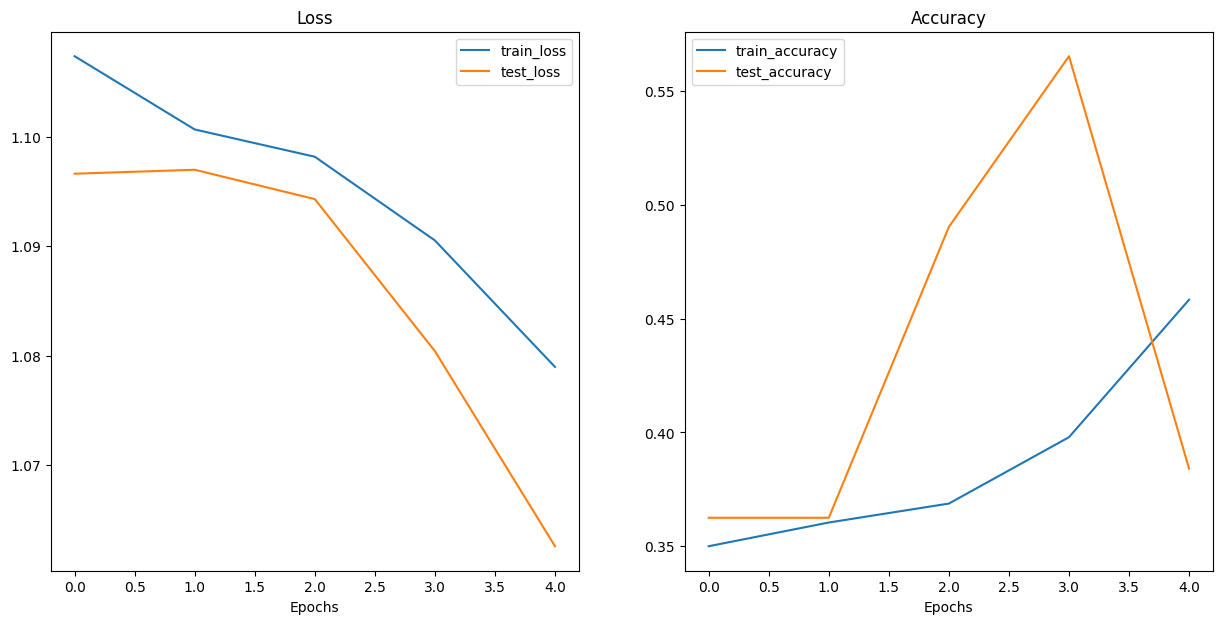

In [185]:
plot_loss_curves(model_0_results)

In [186]:
import torchvision

image_tensor = torchvision.io.read_image("images (1).jpg").type(torch.float32)
image_tensor = image_tensor / 255
image_tensor

tensor([[[0.8275, 0.9686, 1.0000,  ..., 0.9843, 0.9843, 0.9843],
         [0.9255, 0.9882, 0.9569,  ..., 0.9843, 0.9843, 0.9843],
         [1.0000, 0.9961, 0.9255,  ..., 0.9843, 0.9843, 0.9843],
         ...,
         [0.0235, 0.0235, 0.0235,  ..., 0.0235, 0.0235, 0.0235],
         [0.0235, 0.0235, 0.0235,  ..., 0.0235, 0.0235, 0.0235],
         [0.0235, 0.0235, 0.0235,  ..., 0.0235, 0.0235, 0.0235]],

        [[0.5490, 1.0000, 0.9922,  ..., 0.9843, 0.9843, 0.9843],
         [0.7176, 1.0000, 1.0000,  ..., 0.9843, 0.9843, 0.9843],
         [0.8902, 1.0000, 1.0000,  ..., 0.9843, 0.9843, 0.9843],
         ...,
         [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
         [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
         [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0275]],

        [[0.6039, 1.0000, 1.0000,  ..., 0.9843, 0.9843, 0.9843],
         [0.7569, 1.0000, 1.0000,  ..., 0.9843, 0.9843, 0.9843],
         [0.9137, 0.9922, 0.9686,  ..., 0.9843, 0.9843, 0.

In [187]:
custom_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

image_tensor_transformed = custom_transform(image_tensor)
image_tensor.shape, image_tensor_transformed.unsqueeze(0).shape

(torch.Size([3, 225, 225]), torch.Size([1, 3, 64, 64]))

In [189]:
model_0.eval()

with torch.inference_mode():
    pred = model_0(image_tensor_transformed.unsqueeze(0).to(device))

pred_label = class_names[torch.argmax(torch.softmax(pred, dim=1), dim=1)]
pred, pred_label

(tensor([[ 0.2544, -0.1443,  0.0618]], device='cuda:0'), 'pizza')

In [190]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

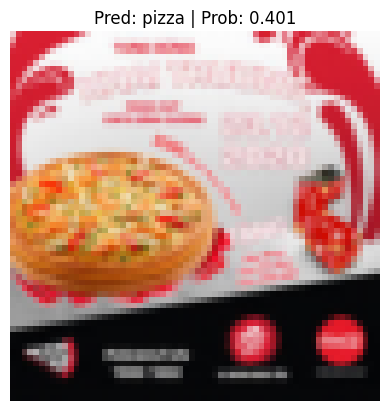

In [191]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path="images (1).jpg",
                    class_names=class_names,
                    transform=custom_transform,
                    device=device)